o3f: 1134016 points
3527 unique sequences
174532 unique compounds
984877 hits
149139 misses


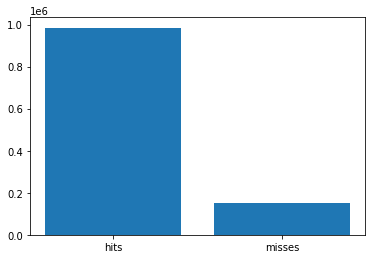

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

o3f = pd.read_csv('model-data/o3f.csv')
print(f"o3f: {len(o3f)} points\n{len(o3f['seq'].unique())} unique sequences\n{len(o3f['smiles'].unique())} unique compounds")
nhits = sum(o3f['hit'])
nmisses = len(o3f) - nhits 
print(f"{nhits} hits\n{nmisses} misses")

plt.bar(x=['hits','misses'],
        height=[nhits, nmisses],
       )
plt.show()

In [11]:
149139 / (984877  + 149139)

0.1315140174389074

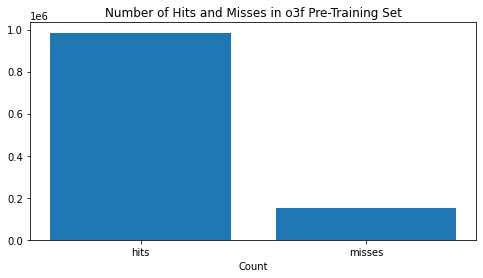

In [8]:
plt.figure(figsize=(8,4))
plt.bar(x=['hits','misses'],
        height=[nhits, nmisses],
       )
plt.xlabel('Count')
plt.title('Number of Hits and Misses in o3f Pre-Training Set')
plt.savefig('img/o3f-hits-hist.png')
plt.show()

,seq,smiles,hit
0,MAPPSEETPLIPQRSCSLLSTEAGALHVLLPARGPGPPQRLSFSFG...,CN(c1ccccc1CNc1nc(cc(N)c1C(=N)C(N)=O)-c1cc(F)c...,True
1,MGRPLHLVLLSASLAGLLLLGESLFIRREQANNILARVTRANSFLE...,COc1ccc(cc1OC)C(Nc1ccc(cc1)C(N)=N)C(=O)NCc1ccccc1,True
2,MGAIGLLWLLPLLLSTAAVGSGMGTGQRAGSPAAGPPLQPREPLSY...,COc1cc(ccc1Nc1nc(Nc2ccccc2S(=O)(=O)C(C)C)c2[nH...,True
3,MGRPLHLVLLSASLAGLLLLGESLFIRREQANNILARVTRANSFLE...,C[n+]1ccc(CNC(=O)c2cc3cc(N)ccc3n2Cc2cccc(c2)C(...,True
4,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,C[C@@H](NC(=O)c1ccc(cc1F)-c1cc(cnc1N)[C@H]1CCC...,True
...,...,...,...
1134011,MSNSVPLLCFWSLCYCFAAGSPVPFGPEGRLEDKLHKPKATQTEVK...,COc1cc(cc(CO)c1OC)C(C)NC(=O)n1sc2ncccc2c1=O,True
1134012,MEVQLGLGRVYPRPPSKTYRGAFQNLFQSVREAIQNPGPRHPEAAS...,Cc1c(Cl)c(ccc1N1[C@H](CCC1=O)[C@@H](O)C(F)(F)F...,True
1134013,MEPSATPGAQMGVPPGSREPSPVPPDYEDEFLRYLWRDYLYPKQYE...,O=C1CCC(N1Cc1csc(n1)-c1ccccc1)c1ccccc1-c1ccccc1,True
1134014,MVNSTHRGMHTSLHLWNRSSYRLHSNASESLGKGYSDGGCYEQLFV...,CC(=O)N[C@@H](CCCNC(N)=N)C(=O)N[C@H]1CC(=O)NCC...,True
